# 22AIE304 Deep Learning
# Labsheet 2

## Name: Aniketh Vijesh
## Roll No: AM.EN.U4AIE22009

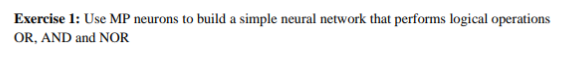

In [1]:
import numpy as np

class MPNeuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def activate(self, inputs):
        weighted_sum = np.dot(inputs, self.weights)
        
        return 1 if weighted_sum >= self.threshold else 0

def logical_operations():
    and_neuron = MPNeuron(weights=[1, 1], threshold=2)

    or_neuron = MPNeuron(weights=[1, 1], threshold=1)

    nor_neuron = MPNeuron(weights=[-1, -1], threshold=-1)

    inputs = [
        (0, 0),
        (0, 1),
        (1, 0),
        (1, 1)
    ]

    and_results = [and_neuron.activate(x) for x in inputs]
    or_results = [or_neuron.activate(x) for x in inputs]
    nor_results = [nor_neuron.activate(x) for x in inputs]

    return {
        'AND': and_results,
        'OR': or_results,
        'NOR': nor_results
    }

if __name__ == "__main__":
    results = logical_operations()
    print("Results:")
    print("AND:", results['AND'])
    print("OR:", results['OR'])
    print("NOR:", results['NOR'])


Results:
AND: [0, 0, 0, 1]
OR: [0, 1, 1, 1]
NOR: [1, 1, 1, 0]


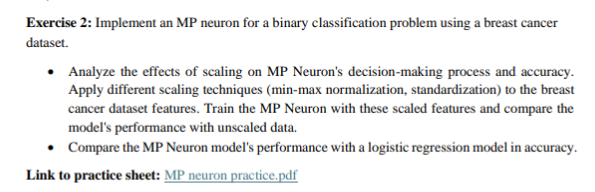